# 国际足联世界杯

国际足联世界杯（FIFA World Cup），通常简称世界杯，是世界足坛规模最大、最具影响力的赛事。1930年为世界杯的首届比赛，冠军是乌拉圭队；1942年和1946年因为世界大战而停办。世界杯每四年举办一次，与奥运会交替进行，自1998年法国世界杯起，电视转播观众人数达到40亿人次，远远超过奥运会，成为世界上最受欢迎的体育盛会。

## 数据： 
数据来源 - 已经举办的二十届世界杯的历史数据，包括比赛结果，参赛球员，etc。

## 参考条目：

https://zh.wikipedia.org/zh-cn/國際足協世界盃

https://www.fifa.com


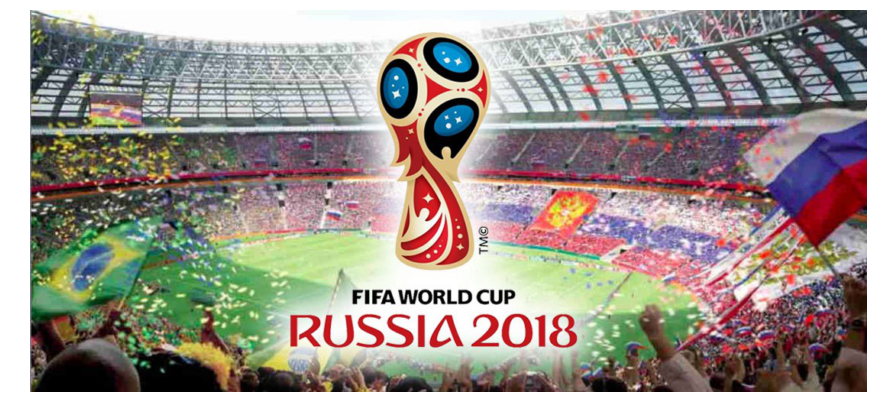

In [104]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import  Image
%matplotlib inline

plt.figure(figsize=(15,10))
img = np.array(Image.open(r"../input/russia-2018.jpeg"))
plt.imshow(img,interpolation="bilinear")
plt.axis("off")
plt.show()

In [105]:
import pandas as pd
import seaborn as sns
import itertools
import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud,STOPWORDS
import networkx as nx 
import io
import base64
import os

# 数据概览

In [106]:
matches  = pd.read_csv(r"../input/WorldCupMatches.csv")
players  = pd.read_csv(r"../input/WorldCupPlayers.csv")
cups     = pd.read_csv(r"../input/WorldCups.csv")
display("MATCHES - Info")
display(matches.info())
display("PLAYERS - DATA")
display(players.tail())
display("WORLD CUPS - All DATA")
display(cups)

'MATCHES - Info'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 20 columns):
Year                    852 non-null float64
Datetime                852 non-null object
Stage                   852 non-null object
Stadium                 852 non-null object
City                    852 non-null object
Home Team Name          852 non-null object
Home Team Goals         852 non-null float64
Away Team Goals         852 non-null float64
Away Team Name          852 non-null object
Win conditions          852 non-null object
Attendance              850 non-null float64
Half-time Home Goals    852 non-null float64
Half-time Away Goals    852 non-null float64
Referee                 852 non-null object
Assistant 1             852 non-null object
Assistant 2             852 non-null object
RoundID                 852 non-null float64
MatchID                 852 non-null float64
Home Team Initials      852 non-null object
Away Team Initials      852 non-null object
dtype

None

'PLAYERS - DATA'

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
37779,255959,300186501,ARG,SABELLA Alejandro (ARG),N,19,ALVAREZ,NaN,NaN
37780,255959,300186501,GER,LOEW Joachim (GER),N,6,KHEDIRA,NaN,NaN
37781,255959,300186501,ARG,SABELLA Alejandro (ARG),N,20,AGUERO,NaN,IH46' Y65'
37782,255959,300186501,GER,LOEW Joachim (GER),N,21,MUSTAFI,NaN,NaN
37783,255959,300186501,ARG,SABELLA Alejandro (ARG),N,23,BASANTA,NaN,NaN


'WORLD CUPS - All DATA'

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,819.810
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893.172
7,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32,1.563.135
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32,1.603.975
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97,16,38,1.865.753


# 每届现场观众总人数
* 自1930年首届世界杯以来，本赛事每四年举办一次，除了1942年和1946年因第二次世界大战没有举办。

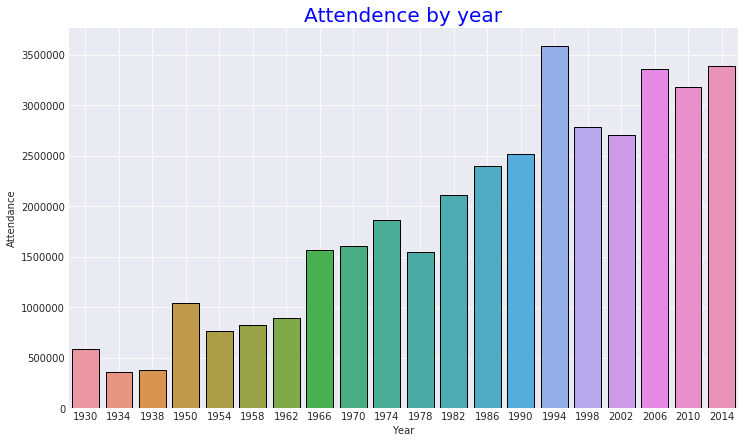

In [107]:
matches.isnull().sum()
sns.set_style("darkgrid")

#removing duplicate rows for match id column 
matches = matches.drop_duplicates(subset="MatchID",keep="first")

#remob=ving null values
matches = matches[matches["Year"].notnull()]

att = matches.groupby("Year")["Attendance"].sum().reset_index()
att["Year"] = att["Year"].astype(int)
plt.figure(figsize=(12,7))
sns.barplot(att["Year"],att["Attendance"],linewidth=1,edgecolor="k"*len(att))
plt.grid(True)
plt.title("Attendence by year",color='b',fontsize = 20)
plt.show()

# 每届杯赛平均每场观众人数
* 共有343万人观看了2014年巴西国际足联世界杯的64场比赛。 这意味着每场比赛的平均观众人数为53,758。
* 1994年美国世界杯达到最高值，平均每场比赛的观众人数为68,991。

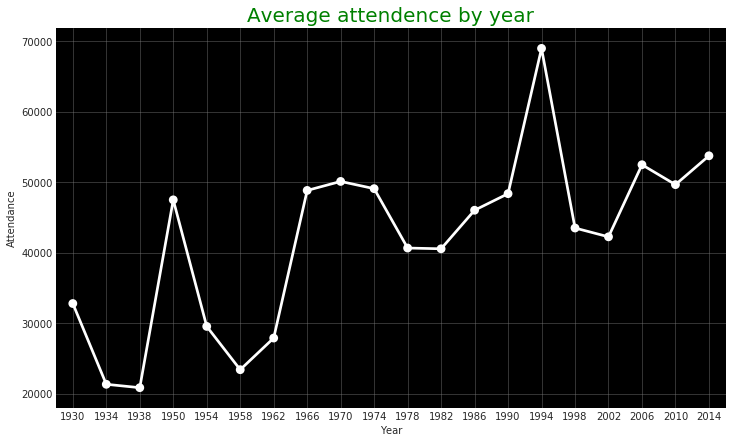

In [108]:
att1 = matches.groupby("Year")["Attendance"].mean().reset_index()
att1["Year"] = att1["Year"].astype(int)
plt.figure(figsize=(12,7))
ax = sns.pointplot(att1["Year"],att1["Attendance"],color="w")
ax.set_facecolor("k")
plt.grid(True,color="grey",alpha=.5)
plt.title("Average attendence by year",color='g',fontsize = 20)
plt.show()

# 每届杯赛的总进球数

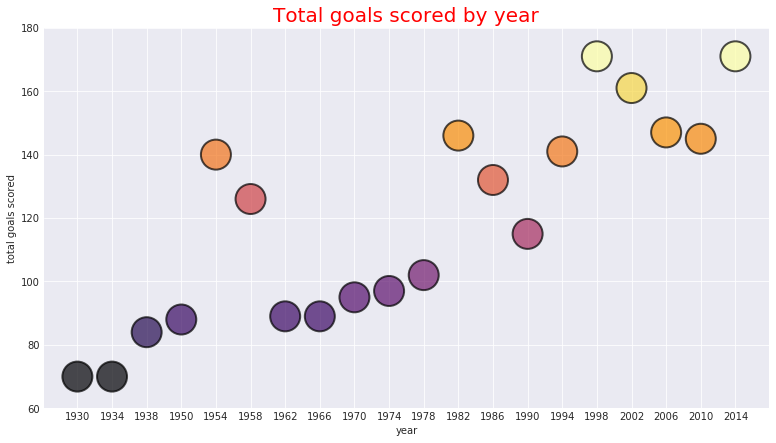

In [109]:
plt.figure(figsize=(13,7))
cups["Year1"] = cups["Year"].astype(str)
ax = plt.scatter("Year1","GoalsScored",data=cups,
            c=cups["GoalsScored"],cmap="inferno",
            s=900,alpha=.7,
            linewidth=2,edgecolor="k",)

#plt.colorbar()
plt.xticks(cups["Year1"].unique())
plt.yticks(np.arange(60,200,20))
plt.title('Total goals scored by year',color='r',fontsize = 20)
plt.xlabel("year")
plt.ylabel("total goals scored")
plt.show()


# 每届杯赛的比赛总场次和参赛球队数。
* 在1934年至1978年的比赛中，每场比赛共有16支球队参加比赛。
* 1938年例外，当时奥地利队在排位赛后和德国队合并，剩下15支球队参加比赛。
* 1950年，印度、苏格兰和土耳其退出比赛，只有13支球队参加比赛。
* 比赛在1982年扩大到24支球队，然后在1998年扩大到32支。

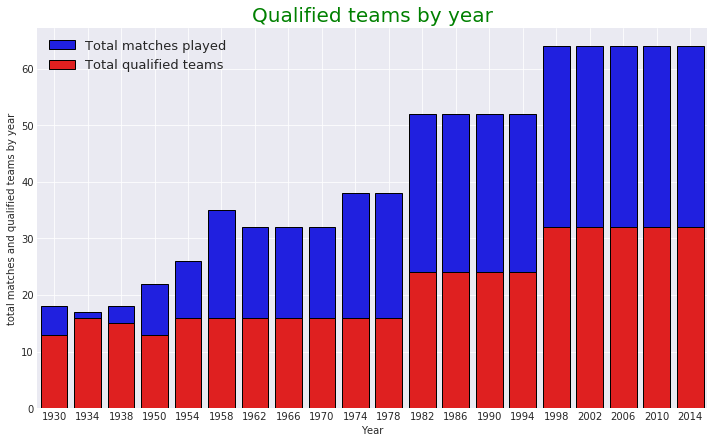

In [110]:
plt.figure(figsize=(12,7))
sns.barplot(cups["Year"],cups["MatchesPlayed"],linewidth=1,
            edgecolor="k"*len(cups),color="b",label="Total matches played")
sns.barplot(cups["Year"],cups["QualifiedTeams"],linewidth=1,
            edgecolor="k"*len(cups),color="r",label="Total qualified teams")
plt.legend(loc="best",prop={"size":13})
plt.title("Qualified teams by year",color='g',fontsize = 20)
plt.grid(True)
plt.ylabel("total matches and qualified teams by year")
plt.show()

# 观众人数最多的比赛排名

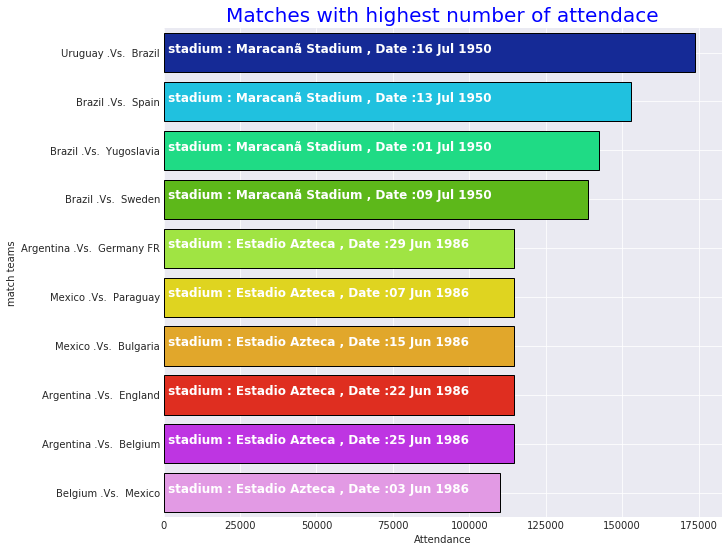

In [111]:
h_att = matches.sort_values(by="Attendance",ascending=False)[:10]
h_att = h_att[['Year', 'Datetime','Stadium', 'City', 'Home Team Name',
              'Home Team Goals', 'Away Team Goals', 'Away Team Name', 'Attendance', 'MatchID']]
h_att["Stadium"] = h_att["Stadium"].replace('Maracan� - Est�dio Jornalista M�rio Filho',"Maracanã Stadium")
h_att["Datetime"] = h_att["Datetime"].str.split("-").str[0]
h_att["mt"] = h_att["Home Team Name"] + " .Vs.  " + h_att["Away Team Name"]

plt.figure(figsize=(10,9))
ax = sns.barplot(y =h_att["mt"],x = h_att["Attendance"],palette="gist_ncar",
                 linewidth = 1,edgecolor="k"*len(h_att))
plt.ylabel("match teams")
plt.xlabel("Attendance")
plt.title("Matches with highest number of attendace",color='b',fontsize = 20)
plt.grid(True)
for i,j in enumerate(" stadium : "+h_att["Stadium"]+" , Date :" + h_att["Datetime"]):
    ax.text(.7,i,j,fontsize = 12,color="white",weight = "bold")
plt.show()

# 平均观众人数最多的体育场排名

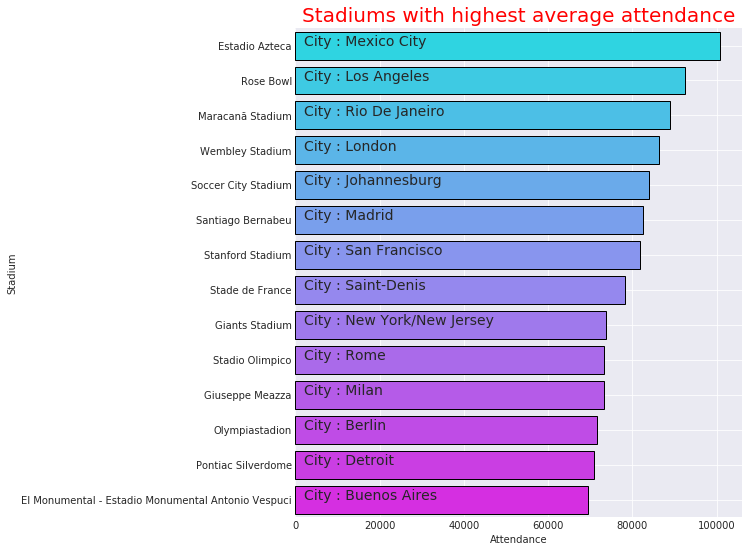

In [112]:
matches["Year"] = matches["Year"].astype(int)
matches["Datetime"] = matches["Datetime"].str.split("-").str[0]


matches["Stadium"] = matches["Stadium"].str.replace('Estadio do Maracana',"Maracanã Stadium")
matches["Stadium"] = matches["Stadium"].str.replace('Maracan� - Est�dio Jornalista M�rio Filho',"Maracanã Stadium")
std  = matches.groupby(["Stadium","City"])["Attendance"].mean().reset_index().sort_values(by = "Attendance",ascending =False)


plt.figure(figsize=(8,9))
ax = sns.barplot(y = std["Stadium"][:14],x = std["Attendance"][:14],palette="cool",
                 linewidth=1,edgecolor = "k"*14)
plt.grid(True)

for i,j in enumerate("  City : " + std["City"][:14]):
    ax.text(.7,i,j,fontsize=14)

plt.title("Stadiums with highest average attendance",color='r',fontsize = 20)
plt.show()


# 举办比赛场次最多的城市排名

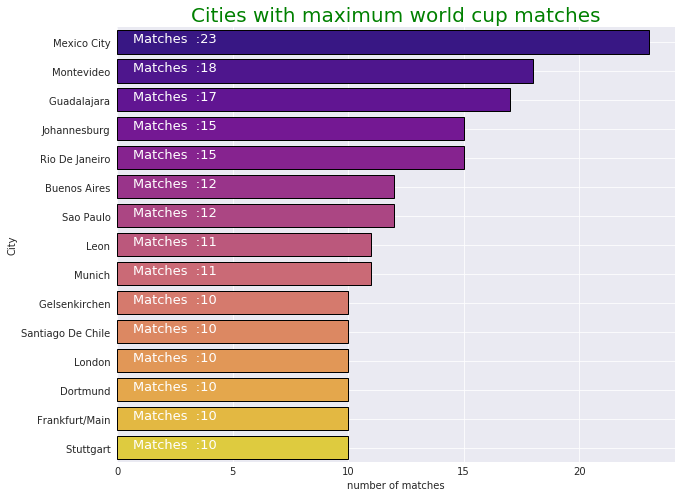

In [113]:
mat_c = matches["City"].value_counts().reset_index()
plt.figure(figsize=(10,8))
ax = sns.barplot(y=mat_c["index"][:15],x = mat_c["City"][:15],palette="plasma",
                 linewidth=1,edgecolor="k"*15)
plt.xlabel("number of matches")
plt.ylabel("City")
plt.grid(True)
plt.title("Cities with maximum world cup matches",color='g',fontsize =20)

for i,j in enumerate("Matches  :" + mat_c["City"][:15].astype(str)):
    ax.text(.7,i,j,fontsize = 13,color="w")
plt.show()

# 平均现场观众最多的城市排名

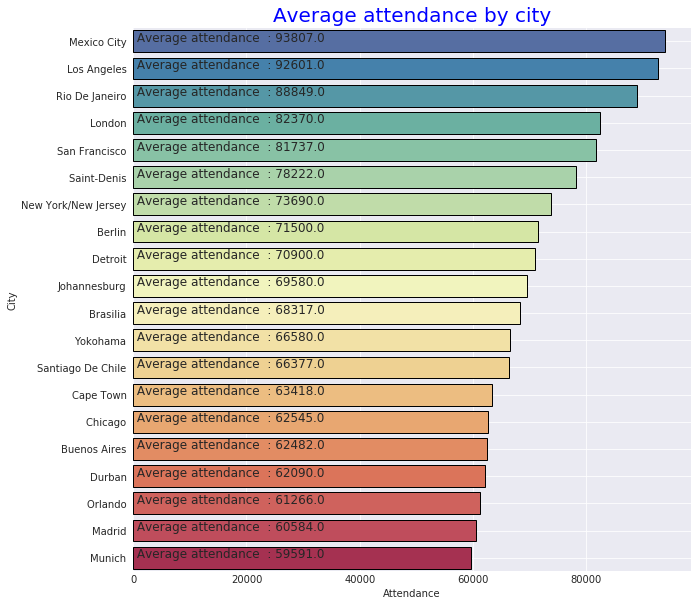

In [114]:
ct_at = matches.groupby("City")["Attendance"].mean().reset_index()
ct_at = ct_at.sort_values(by="Attendance",ascending=False)
ct_at

plt.figure(figsize=(10,10))

ax = sns.barplot("Attendance","City",
            data=ct_at[:20],
            linewidth = 1,
            edgecolor = "k"*20,
            palette  = "Spectral_r")

for i,j in enumerate(" Average attendance  : "+np.around(ct_at["Attendance"][:20],0).astype(str)):
    ax.text(.7,i,j,fontsize=12)
plt.grid(True)

plt.title("Average attendance by city",color='b',fontsize =20)
plt.show()


# 赢得杯赛最多的国家排名
* 八支国家队赢得了20场世界杯比赛;
* 巴西赢了五次，他们是唯一参加过各项比赛的球队;
* 德国和意大利各有四个冠军;
* 阿根廷队和首届冠军乌拉圭队，分别获得两个冠军; 
* 英格兰，法国和西班牙，每个都有一个冠军。

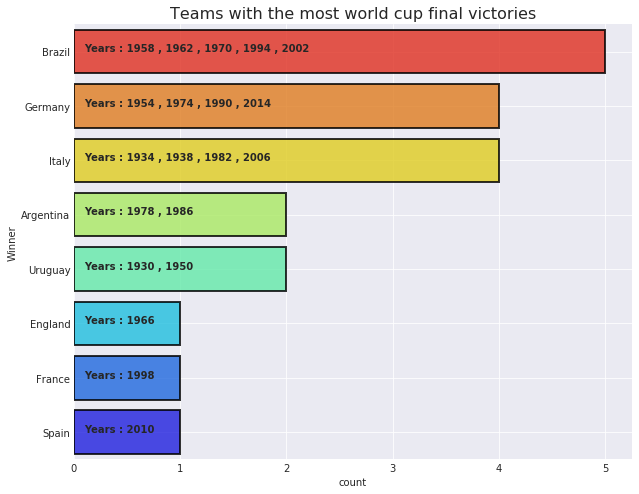

In [115]:
cups["Winner"]=cups["Winner"].replace("Germany FR","Germany")
cups["Runners-Up"]=cups["Runners-Up"].replace("Germany FR","Germany")
c1  = cups.groupby("Winner")["Year1"].apply(" , ".join).reset_index()
c2  = cups.groupby("Winner")['Year'].count().reset_index()
c12 = c1.merge(c2,left_on="Winner",right_on="Winner",how="left")
c12 = c12.sort_values(by = "Year",ascending =False)

plt.figure(figsize=(10,8))
ax = sns.barplot("Year","Winner",data=c12,
            palette="jet_r",
            alpha=.8,
            linewidth=2,
            edgecolor="k"*len(c12))
for i,j in enumerate("Years : " + c12["Year1"]):
    ax.text(.1,i,j,weight = "bold")

plt.title("Teams with the most world cup final victories",fontsize =16)
plt.grid(True)
plt.xlabel("count")
plt.show()

# 世界杯决赛战战果

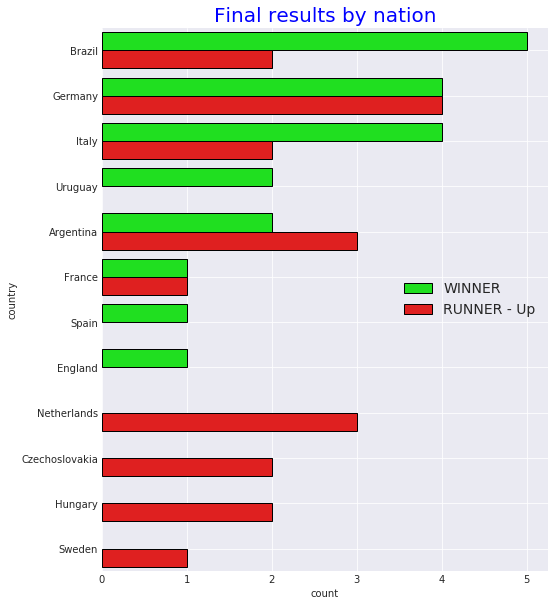

In [116]:
cou = cups["Winner"].value_counts().reset_index()
cou_w = cou.copy()
cou_w.columns = ["country","count"]
cou_w["type"] = "WINNER"

cou_r = cups["Runners-Up"].value_counts().reset_index()
cou_r.columns = ["country","count"]
cou_r["type"] = "RUNNER - Up"

cou_t = pd.concat([cou_w,cou_r],axis=0)

plt.figure(figsize=(8,10))
sns.barplot("count","country",data=cou_t,hue="type",palette=["lime","r"],
            linewidth=1,edgecolor="k"*len(cou_t))
plt.grid(True)
plt.legend(loc="center right",prop={"size":14})
plt.title("Final results by nation",color='b',fontsize =20)
plt.show()

# 获得过世界杯三、四名的国家

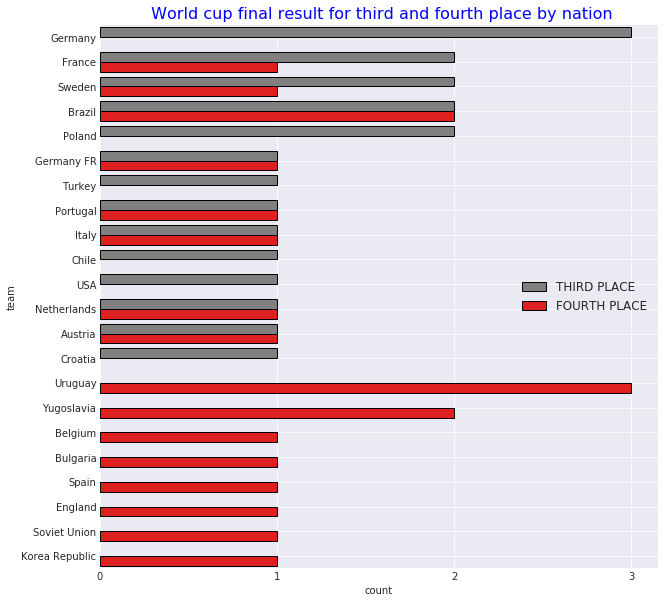

In [117]:
thrd = cups["Third"].value_counts().reset_index()
thrd.columns = ["team","count"]
thrd["type"] = "THIRD PLACE"

frth = cups["Fourth"].value_counts().reset_index()
frth.columns = ["team","count"]
frth["type"] = "FOURTH PLACE"

plcs = pd.concat([thrd,frth],axis=0)

plt.figure(figsize=(10,10))
sns.barplot("count","team",data=plcs,hue="type",
           linewidth=1,edgecolor="k"*len(plcs),
           palette = ["grey","r"])
plt.grid(True)
plt.xticks(np.arange(0,4,1))
plt.title(" World cup final result for third and fourth place by nation",color='b',fontsize =16)
plt.legend(loc="center right",prop={"size":12})
plt.show()

# 参加世界杯比赛场次最多的国家排名

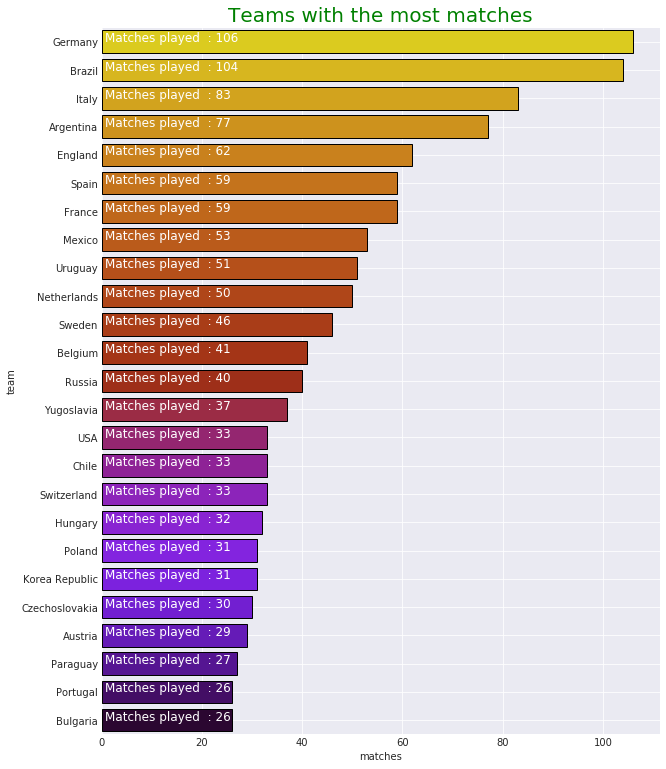

In [118]:
matches["Home Team Name"] = matches["Home Team Name"].str.replace('rn">United Arab Emirates',"United Arab Emirates")
matches["Home Team Name"] = matches["Home Team Name"].str.replace("C�te d'Ivoire","Côte d’Ivoire")
matches["Home Team Name"] = matches["Home Team Name"].str.replace('rn">Republic of Ireland',"Republic of Ireland")
matches["Home Team Name"] = matches["Home Team Name"].str.replace('rn">Bosnia and Herzegovina',"Bosnia and Herzegovina")
matches["Home Team Name"] = matches["Home Team Name"].str.replace('rn">Serbia and Montenegro',"Serbia and Montenegro")
matches["Home Team Name"] = matches["Home Team Name"].str.replace('rn">Trinidad and Tobago',"Trinidad and Tobago")
matches["Home Team Name"] = matches["Home Team Name"].str.replace("Soviet Union","Russia")
matches["Home Team Name"] = matches["Home Team Name"].str.replace("Germany FR","Germany")

matches["Away Team Name"] = matches["Away Team Name"].str.replace('rn">United Arab Emirates',"United Arab Emirates")
matches["Away Team Name"] = matches["Away Team Name"].str.replace("C�te d'Ivoire","Côte d’Ivoire")
matches["Away Team Name"] = matches["Away Team Name"].str.replace('rn">Republic of Ireland',"Republic of Ireland")
matches["Away Team Name"] = matches["Away Team Name"].str.replace('rn">Bosnia and Herzegovina',"Bosnia and Herzegovina")
matches["Away Team Name"] = matches["Away Team Name"].str.replace('rn">Serbia and Montenegro',"Serbia and Montenegro")
matches["Away Team Name"] = matches["Away Team Name"].str.replace('rn">Trinidad and Tobago',"Trinidad and Tobago")
matches["Away Team Name"] = matches["Away Team Name"].str.replace("Germany FR","Germany")
matches["Away Team Name"] = matches["Away Team Name"].str.replace("Soviet Union","Russia")

ht = matches["Home Team Name"].value_counts().reset_index()
ht.columns = ["team","matches"]
at = matches["Away Team Name"].value_counts().reset_index()
at.columns = ["team","matches"]
mt = pd.concat([ht,at],axis=0)
mt = mt.groupby("team")["matches"].sum().reset_index().sort_values(by="matches",ascending=False)

plt.figure(figsize=(10,13))
ax = sns.barplot("matches","team",data=mt[:25],palette="gnuplot_r",
                 linewidth=1,edgecolor="k"*25)
plt.grid(True)
plt.title("Teams with the most matches",color='g',fontsize =20)
for i,j in enumerate("Matches played  : " + mt["matches"][:25].astype(str)):
    ax.text(.7,i,j,fontsize=12,color="white")

# 参加过世界杯届数最多的国家排名

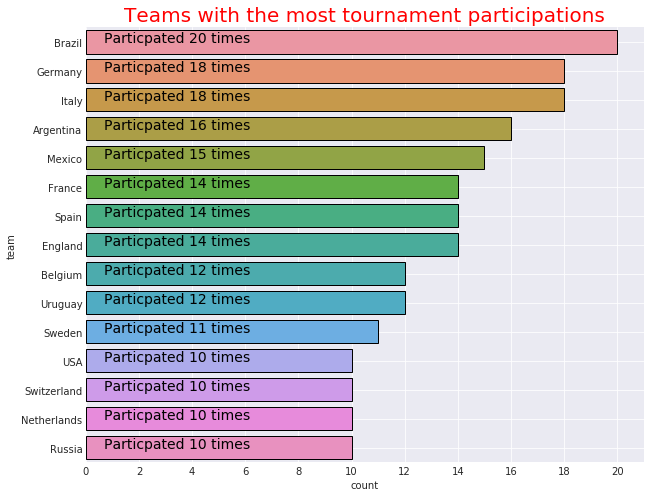

In [119]:
hy = matches[["Year","Home Team Name"]]
hy.columns = ["year","team"]
hy["type"] = "HOME TEAM"
ay = matches[["Year","Away Team Name"]]
ay.columns = ["year","team"]
ay["type"] = "AWAY TEAM"

home_away = pd.concat([hy,ay],axis=0)
yt = home_away.groupby(["year","team"]).count().reset_index()
yt = yt["team"].value_counts().reset_index()

plt.figure(figsize=(10,8))
ax = sns.barplot("team","index",data=yt[:15],linewidth=1,edgecolor="k"*15)

for i,j in enumerate("Particpated " + yt["team"][:15].astype(str) + " times"):
    ax.text(.7,i,j,fontsize=14,color="k")
plt.grid(True)
    
plt.title("Teams with the most tournament participations",color='r',fontsize =20)
plt.ylabel("team")
plt.xlabel("count")
plt.xticks(np.arange(0,22,2))
plt.show()

# 按国家划分的比赛结果

In [120]:
def label(matches):
    if matches["Home Team Goals"] > matches["Away Team Goals"]:
        return "Home team win"
    if matches["Away Team Goals"] > matches["Home Team Goals"]:
        return "Away team win"
    if matches["Home Team Goals"] == matches["Away Team Goals"]:
        return "DRAW"

matches["outcome"] = matches.apply(lambda matches:label(matches),axis=1)
# plt.figure(figsize=(9,9))
# matches["outcome"].value_counts().plot.pie(autopct="%1.0f%%",fontsize =14,
#                                            colors = sns.color_palette("husl"),
#                                            wedgeprops={"linewidth":2,"edgecolor":"white"},
#                                            shadow=True)
# circ = plt.Circle((0,0),.7,color="white")
# plt.gca().add_artist(circ)
# plt.title("# Match outcomes by home and away teams",color='g',fontsize=16)
# plt.show()

In [121]:
matches[['Home Team Name','Home Team Goals', 'Away Team Goals', 'Away Team Name',"outcome"]]


def win_label(matches):
    if matches["Home Team Goals"] > matches["Away Team Goals"]:
        return matches["Home Team Name"]
    if matches["Home Team Goals"] < matches["Away Team Goals"]:
        return matches["Away Team Name"]
    if matches["Home Team Goals"] == matches["Away Team Goals"]:
        return "DRAW"
    
def lst_label(matches):
    if matches["Home Team Goals"] < matches["Away Team Goals"]:
        return matches["Home Team Name"]
    if matches["Home Team Goals"] > matches["Away Team Goals"]:
        return matches["Away Team Name"]
    if matches["Home Team Goals"] == matches["Away Team Goals"]:
        return "DRAW"
    
matches["win_team"]  = matches.apply(lambda matches:win_label(matches),axis=1)
matches["lost_team"] = matches.apply(lambda matches:lst_label(matches),axis=1)
lst = matches["lost_team"].value_counts().reset_index()
win = matches["win_team"].value_counts().reset_index()
wl  = win.merge(lst,left_on="index",right_on="index",how="left")
wl = wl[wl["index"] != "DRAW"]
wl.columns  = ["team","wins","loses"]

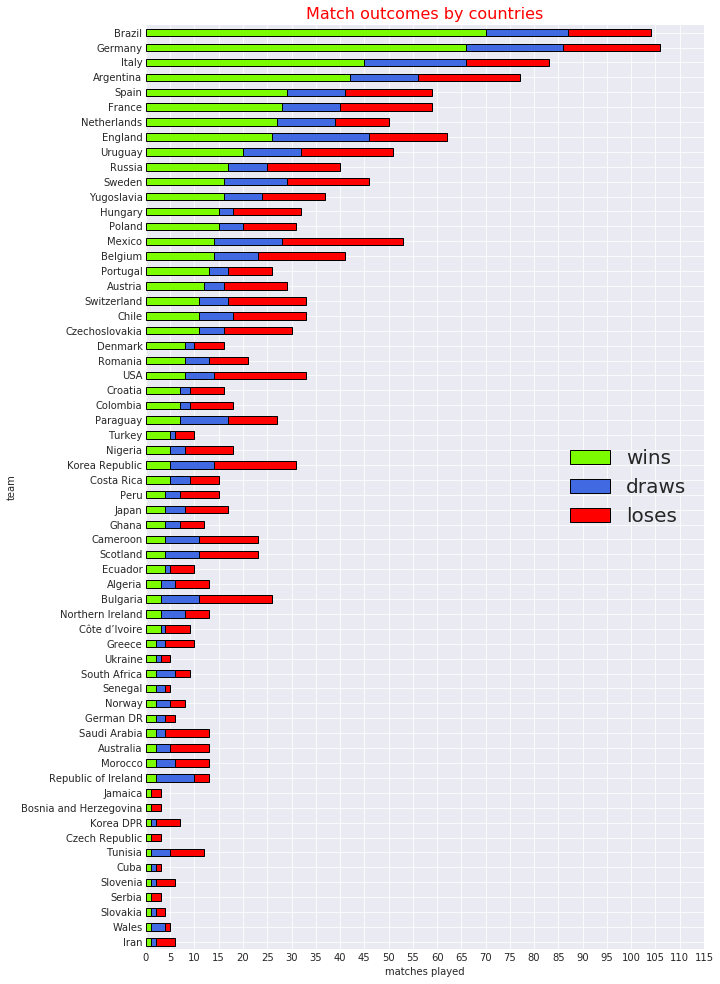

In [122]:
wl1 = wl.copy()
wl1 = wl1.merge(mt,left_on="team",right_on="team",how="left")
wl1["draws"] = wl1["matches"]-(wl1["wins"]+wl1["loses"])
wl1.index = wl1.team
wl1 = wl1.sort_values(by="wins",ascending=True)
wl1[["wins","draws","loses"]].plot(kind="barh",stacked=True,figsize=(10,17),
                                 colors=["lawngreen","royalblue","r"],
                                  linewidth=1,edgecolor="k"*len(wl1))
plt.legend(loc="center right",prop={"size":20})
plt.xticks(np.arange(0,120,5))
plt.title("Match outcomes by countries",color='r',fontsize=16)
plt.xlabel("matches played")
plt.show()

## 获得最多胜、负和平局的国家排名

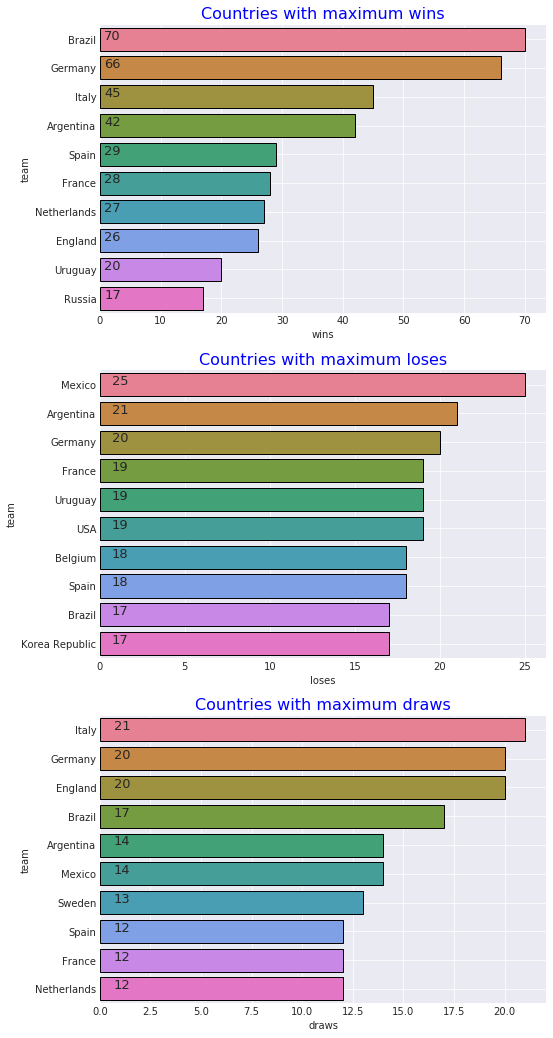

In [123]:
cols = [ 'wins', 'loses', 'draws']
length = len(cols)

plt.figure(figsize=(8,18))
for i,j in itertools.zip_longest(cols,range(length)):
    plt.subplot(3,1,j+1)
    ax = sns.barplot(i,"team",data=wl1.sort_values(by=i,ascending=False)[:10],
                     linewidth=1,edgecolor="k"*10,palette="husl")
    for k,l in enumerate(wl1.sort_values(by=i,ascending=False)[:10][i]):
        ax.text(.7,k,l,fontsize=13)
    
    plt.grid(True)
    plt.title("Countries with maximum "+i,color='b',fontsize=16)

## 总进球数最多的国家排名

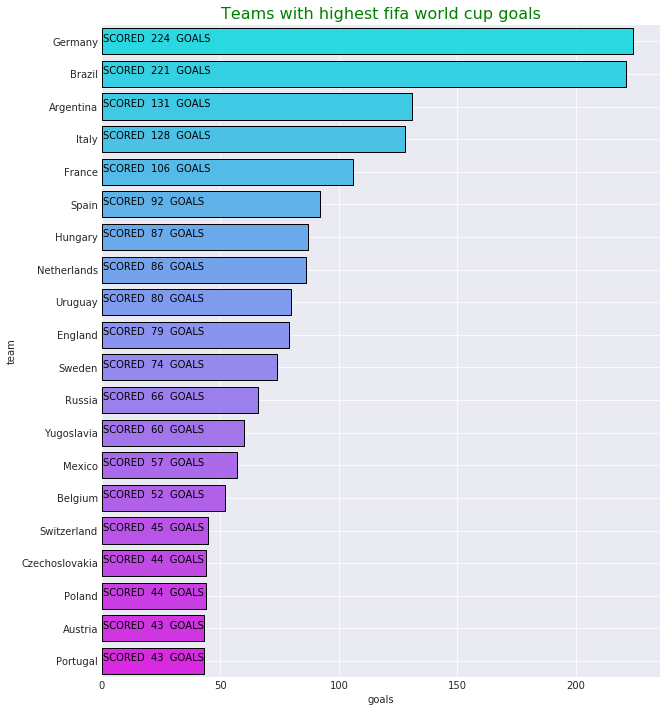

In [124]:
tt_gl_h = matches.groupby("Home Team Name")["Home Team Goals"].sum().reset_index()
tt_gl_h.columns = ["team","goals"]

tt_gl_a = matches.groupby("Away Team Name")["Away Team Goals"].sum().reset_index()
tt_gl_a.columns = ["team","goals"]

total_goals = pd.concat([tt_gl_h,tt_gl_a],axis=0)
total_goals = total_goals.groupby("team")["goals"].sum().reset_index()
total_goals = total_goals.sort_values(by="goals",ascending =False)
total_goals["goals"] = total_goals["goals"].astype(int)

plt.figure(figsize=(10,12))
ax= sns.barplot("goals","team",data=total_goals[:20],palette="cool",
                linewidth=1,edgecolor="k"*20)

for i,j in enumerate("SCORED  " +total_goals["goals"][:20].astype(str) + "  GOALS"):
    ax.text(.7,i,j,fontsize = 10,color="k")

plt.title("Teams with highest fifa world cup goals",color='g',fontsize=16)
plt.grid(True)
plt.show()

* ## 单场进球数最多的比赛

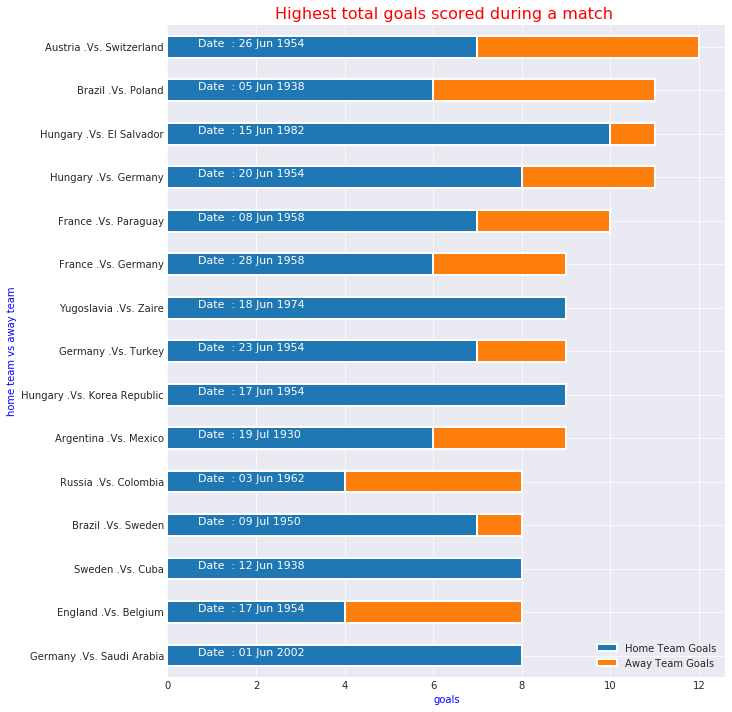

In [126]:
matches["total_goals"] = matches["Home Team Goals"] + matches["Away Team Goals"]
hig_gl = matches.sort_values(by="total_goals",ascending =False)[:15][['Year', 'Datetime', 'Stage', 'Stadium', 'City', 'Home Team Name',
                                                                  'Home Team Goals', 'Away Team Goals', 'Away Team Name',"total_goals"]]
hig_gl["match"] = hig_gl["Home Team Name"] + " .Vs. " + hig_gl['Away Team Name']
hig_gl.index = hig_gl["match"]
hig_gl = hig_gl.sort_values(by="total_goals",ascending =True)
ax= hig_gl[["Home Team Goals","Away Team Goals"]].plot(kind="barh",stacked=True,
                                                       figsize=(10,12),linewidth=2,
                                                       edgecolor="w"*15)

plt.ylabel("home team vs away team",color="b")
plt.xlabel("goals",color="b")
plt.title("Highest total goals scored during a match ",color='r',fontsize=16)

for i,j in enumerate("Date  : " + hig_gl["Datetime"]):
    ax.text(.7,i,j,color="w",fontsize=11)
    
plt.show()

## 每届杯赛每场比赛进球数的boxplot

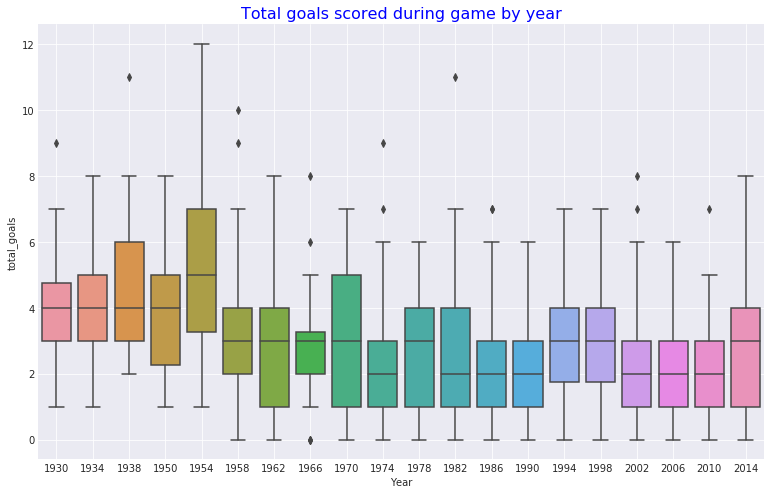

In [128]:
plt.figure(figsize=(13,8))
sns.boxplot(y=matches["total_goals"],
            x=matches["Year"])
plt.grid(True)
plt.title("Total goals scored during game by year",color='b',fontsize=16)
plt.show()


## 出场次数最多的裁判排名

著名的拉夫山·伊尔马托夫，乌兹别克籍足球裁判。之前执法世界杯9场比赛，2018年俄罗斯世界杯执法了2场比赛。执法最多世界杯比赛的纪录保持者。

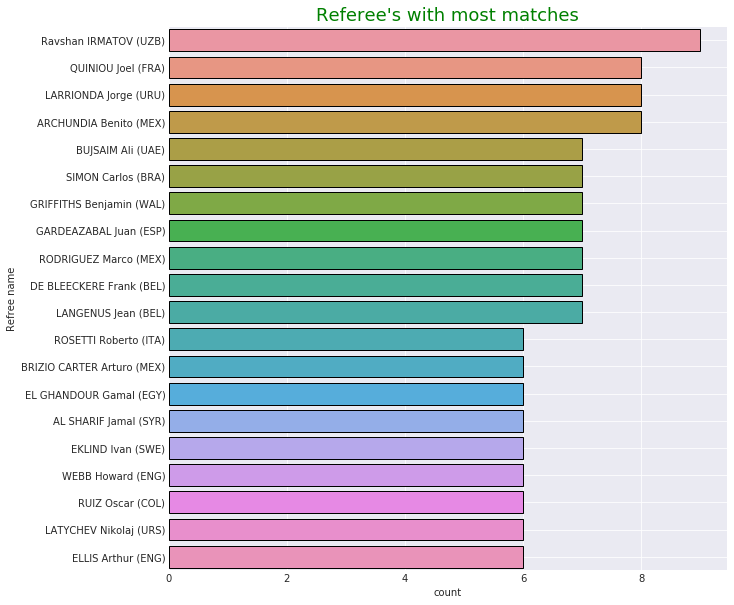

In [130]:
ref = matches["Referee"].value_counts().reset_index()
ref = ref.sort_values(by="Referee",ascending=False)

plt.figure(figsize=(10,10))
sns.barplot("Referee","index",data=ref[:20],linewidth=1,edgecolor="k"*20)
plt.xlabel("count")
plt.ylabel("Refree name")
plt.grid(True)
plt.title("Referee's with most matches",color='g',fontsize=18)
plt.show()

# 球队比较

In [131]:
#TEAM COMPARATOR
matches_played = mt.copy()
mat_new = matches_played.merge(lst,left_on="team",right_on="index",how="left")
mat_new = mat_new.merge(win,left_on="team",right_on="index",how="left")
mat_new = mat_new[["team","matches","lost_team","win_team"]]
mat_new = mat_new.fillna(0)
mat_new["win_team"] = mat_new["win_team"].astype(int)
mat_new["draws"]    = (mat_new["matches"]) - (mat_new["lost_team"] + mat_new["win_team"])
mat_new = mat_new.merge(total_goals,left_on="team",right_on="team",how="left")
mat_new = mat_new.rename(columns={"win_team":"wins","lost_team":"loses"})

def team_compare(team1,team2):
    
    lst = [team1,team2]
    dat = mat_new[mat_new["team"].isin(lst)]
    
    plt.figure(figsize=(12,10))
    cols   = ["matches","goals","wins","loses","draws"]
    length = len(cols)
    
    for i,j in itertools.zip_longest(cols,range(length)):
        
        fig = plt.subplot(3,2,j+1)
        ax  = sns.barplot(dat[i],dat["team"],palette=["royalblue","r"],
                         linewidth=2,edgecolor="k"*len(lst))
        plt.ylabel("")
        plt.yticks(fontsize=13)
        plt.grid(True,color="grey",alpha=.3)
        plt.title(i,color="b",fontsize=15)
        plt.subplots_adjust(wspace = .3,hspace =.5)
        fig.set_facecolor("w")
        
        for k,l in enumerate(dat[i].values):
            ax.text(.7,k,l,weight = "bold",fontsize = 20)
            

# 球队得分能力排名

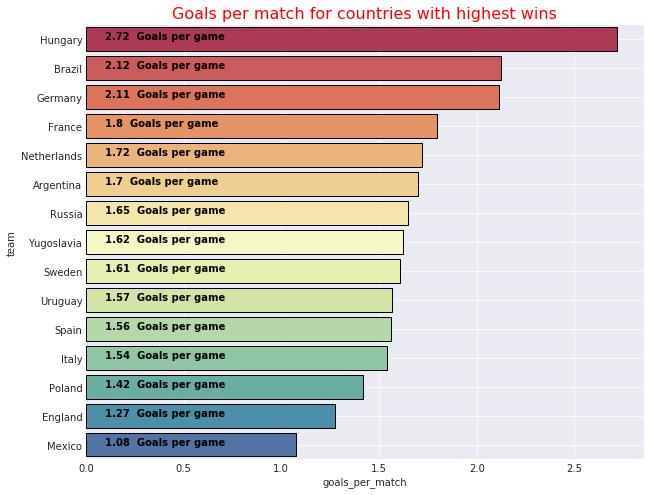

In [133]:
mat_new["goals_per_match"] = mat_new["goals"] / mat_new["matches"]
cou_lst = mat_new.sort_values(by="wins",ascending=False)[:15]["team"].tolist()
cou_gpm = mat_new[mat_new["team"].isin(cou_lst)]
cou_gpm = cou_gpm.sort_values(by="goals_per_match",ascending=False)

plt.figure(figsize=(10,8))
ax = sns.barplot("goals_per_match","team",
                 linewidth=1,
                 edgecolor=["k"]*len(cou_gpm),
                 data=cou_gpm,
                 palette="Spectral")

for i,j in enumerate(np.round(cou_gpm["goals_per_match"],2).astype(str) + "  Goals per game"):
    ax.text(.1,i,j,color="k",weight = "bold")
    
plt.grid(True)
plt.title("Goals per match for countries with highest wins",color='r',fontsize=16)
plt.show()

In [134]:
import networkx as nx 

def interactions(year,color):
    
    df  =  matches[matches["Year"] == year][["Home Team Name","Away Team Name"]]
    G   = nx.from_pandas_dataframe(df,"Home Team Name","Away Team Name")
    
    plt.figure(figsize=(10,9))
    
    nx.draw_kamada_kawai(G,with_labels = True,
                         node_size  = 2500,
                         node_color = color,
                         node_shape = "h",
                         edgecolor  = "k",
                         linewidths  = 5 ,
                         font_size  = 12 ,
                         alpha=.8)
    
    plt.title("Interaction between teams :" + str(year) , fontsize =16 , color = "b")
    

# 2014年巴西世界杯参赛球队

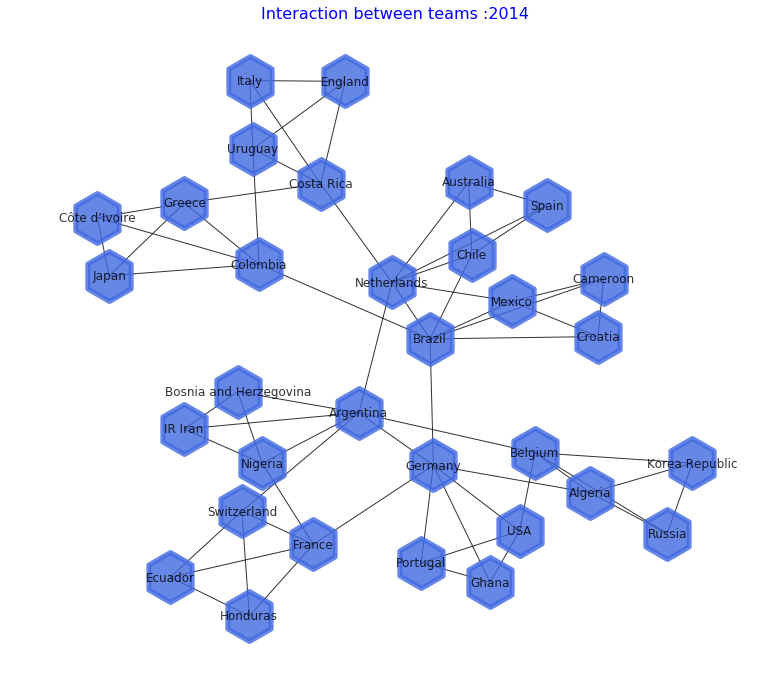

In [135]:
interactions(2014,"royalblue")

# 1994年美国世界杯参赛球队

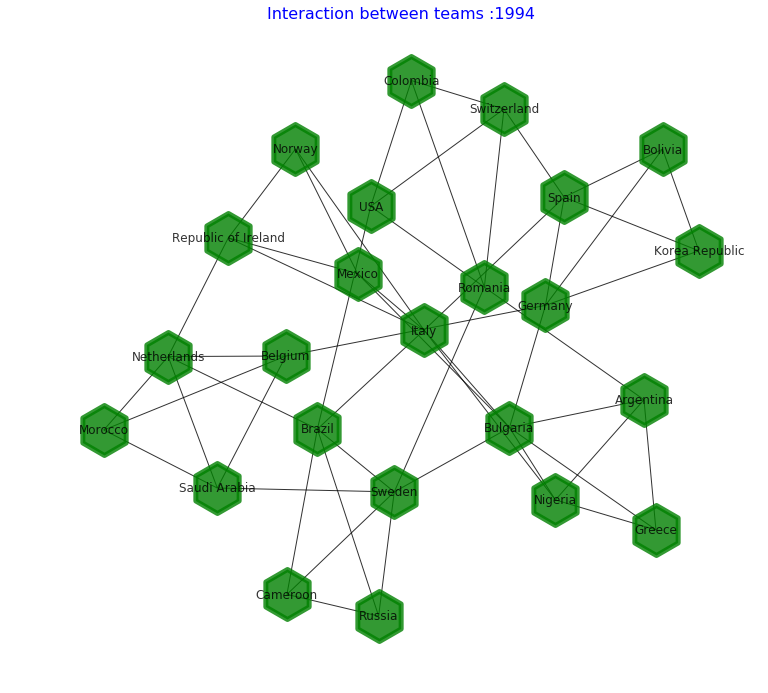

In [136]:
interactions(1994,"g")

# 1950年巴西世界杯参赛球队

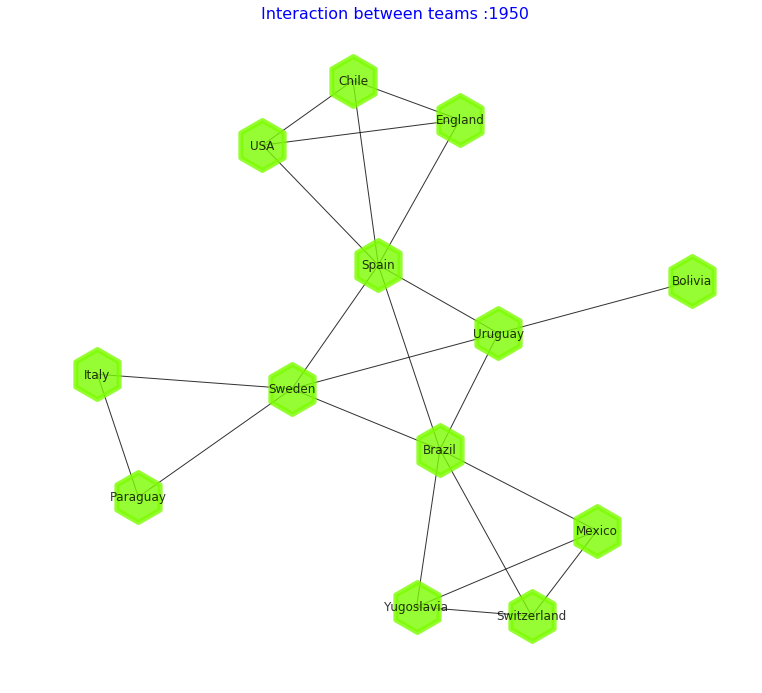

In [137]:
interactions(1950,"lawngreen")

# 球队参加比赛场次总数排名

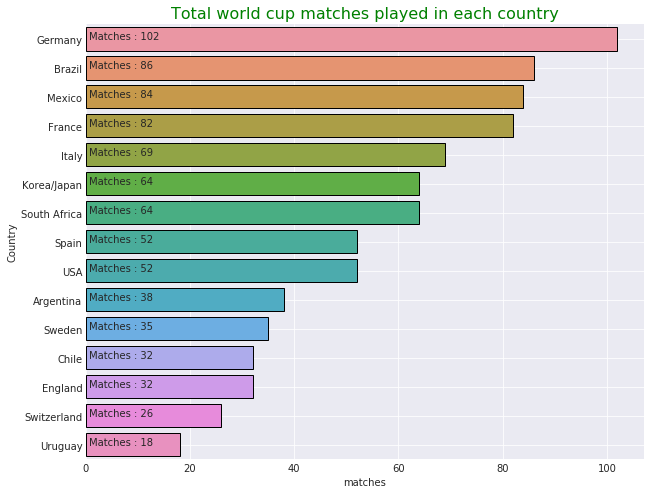

In [141]:
ysc = matches[["Year","Stadium","City","MatchID"]]
cy  = cups[["Year","Country"]]
ysc = ysc.merge(cy,left_on="Year",right_on="Year",how="left")
#ysc["Stadium"] = ysc["Stadium"].str.split(",").str[0]
ysc["std_cty"] = ysc["Stadium"] +" , "+ ysc["City"]

cnt_mat  =  ysc.groupby("Country")["MatchID"].nunique().reset_index()
cnt_mat  =  cnt_mat.sort_values(by= "MatchID",ascending=False)
cnt_mat


plt.figure(figsize=(10,8))

ax = sns.barplot("MatchID","Country",
                data=cnt_mat,
                linewidth=1,
                edgecolor="k"*cnt_mat["Country"].nunique())

for i,j in enumerate("Matches : " + cnt_mat["MatchID"].astype(str)):
    ax.text(.7 ,i,j)

plt.title("Total world cup matches played in each country",color='g',fontsize=16)
plt.grid(True)
plt.xlabel("matches")
plt.show()

# 每个国家使用的球场

In [143]:
ysc["Country_yr"] = ysc["Country"] + " - " + ysc["Year"].astype(str)


def stadium_country(country,color):
    
    dat2 = ysc[ysc["Country"] == country]
    
    plt.figure(figsize=(10,8))

    H = nx.from_pandas_dataframe(dat2,"Country","Stadium")

    nx.draw_kamada_kawai(H,
                         with_labels=True,
                         node_size  = 2500,
                         node_color = color,
                         node_shape = "s",
                         edgecolor  = "k",
                         linewidths  = 7 ,
                         font_size  = 13 ,
                         alpha=.8,
                         weight = "bold")

## 巴西使用的球场

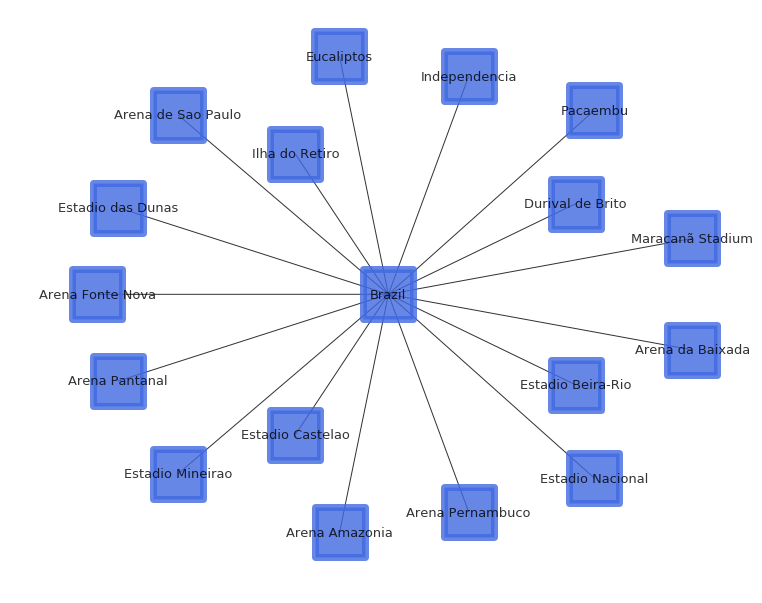

In [146]:
stadium_country("Brazil","royalblue")

## 美国使用的球场

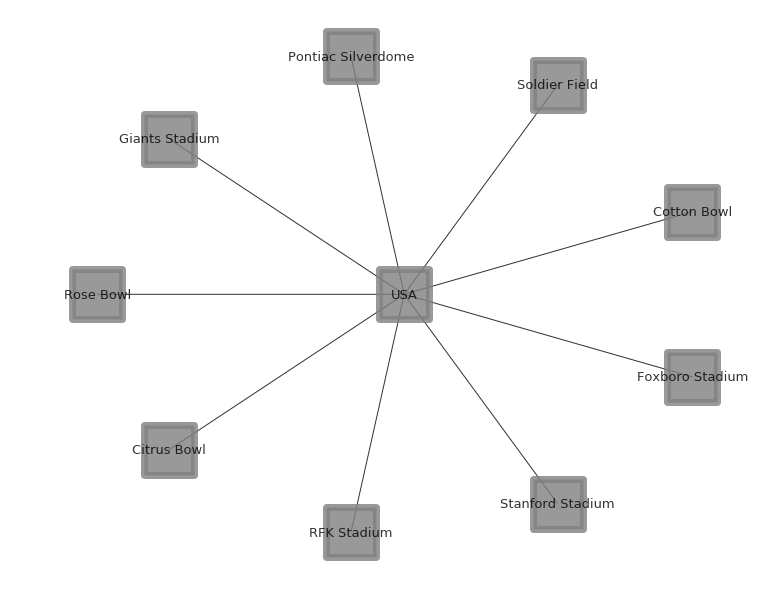

In [157]:
stadium_country("USA","grey")

# 球员姓氏

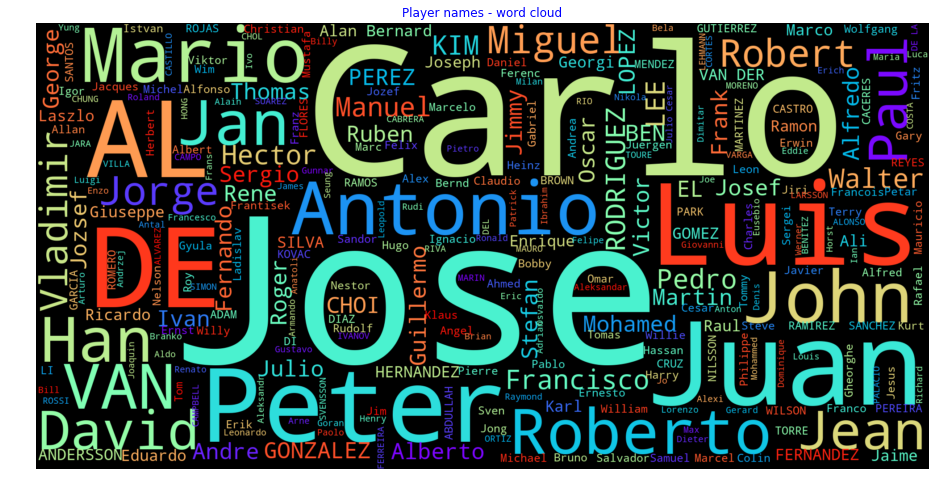

In [148]:
wrds = players["Player Name"].value_counts().keys()

wc = WordCloud(scale=5,max_words=1000,colormap="rainbow").generate(" ".join(wrds))
plt.figure(figsize=(16,18))
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.title("Player names - word cloud",color='b')
plt.show()

# 2018年世界杯八强历史战绩

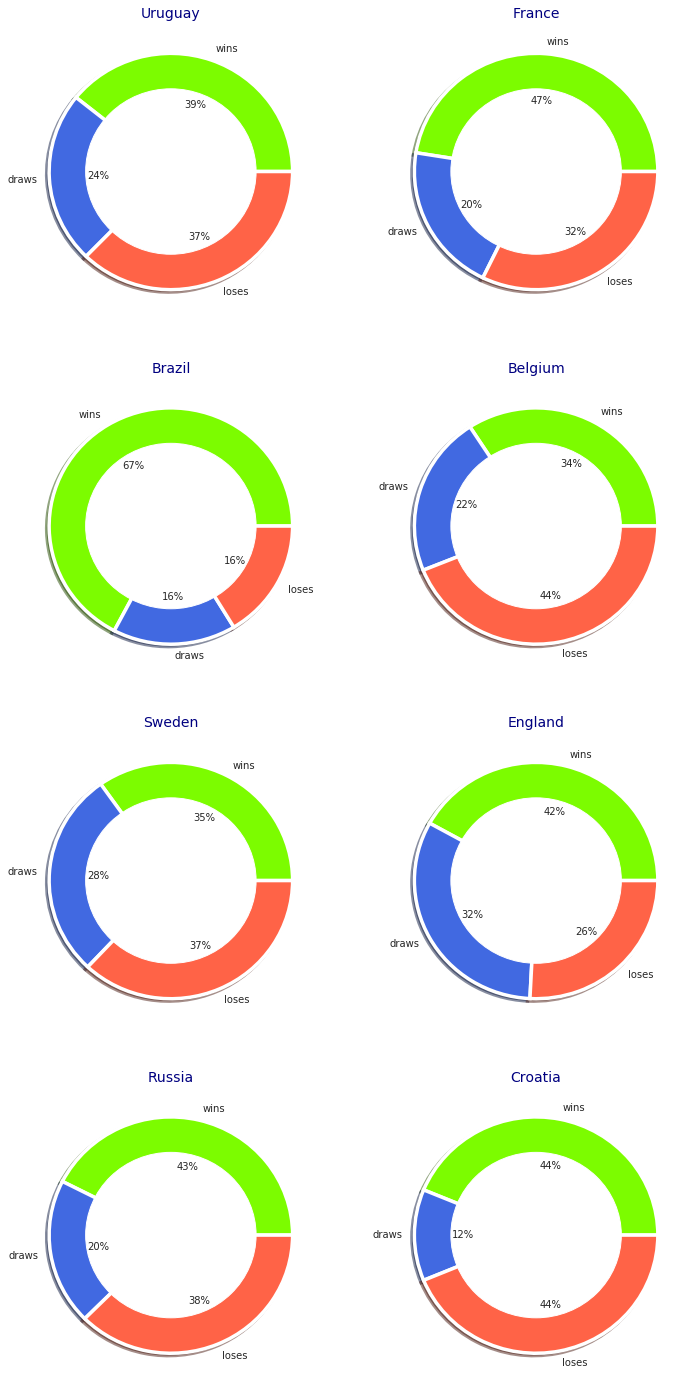

In [149]:
mat_new

cou = ["Uruguay","France",
       "Brazil" , "Belgium",
       "Sweden" , "England",
       "Russia" , "Croatia" ]

length = len(cou)

qtr = mat_new[mat_new["team"].isin(cou)]

plt.figure(figsize=(12,25))

for i,j in itertools.zip_longest(cou,range(length)) : 
    plt.subplot(4,2,j+1)
    
    lab = ["wins","draws","loses"]
    
    plt.pie(qtr[qtr["team"] == i][lab].values.ravel(),
            labels  = lab , 
            autopct = "%1.0f%%",
            shadow  = True,
            wedgeprops = {"linewidth":3.5,"edgecolor":"white"},
            colors  = ["lawngreen","royalblue","tomato"],)
    
    circ = plt.Circle((0,0),.7,color="white")
    plt.gca().add_artist(circ)
    
    plt.title(i,color="navy",fontsize=14)
    

# 2018年世界杯八强得分能力

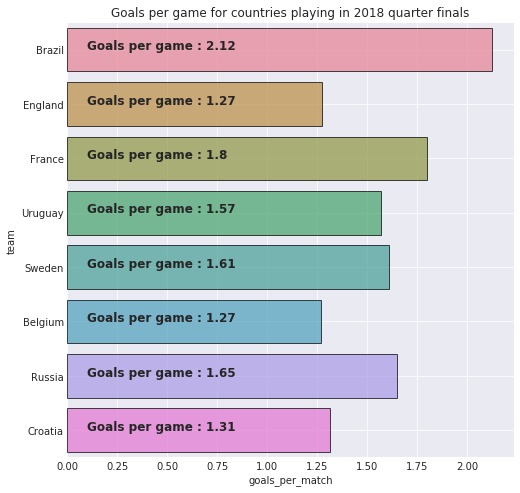

In [153]:
cou = ["Uruguay","France",
       "Brazil" , "Belgium",
       "Sweden" , "England",
       "Russia" , "Croatia" ]

semi = mat_new[mat_new["team"].isin(cou)]

plt.figure(figsize=(8,8))
ax = sns.barplot(y="team",x="goals_per_match",
                data=semi,
                linewidth=1,
                palette = "husl",
                alpha=.7,
                edgecolor = "k"*len(qtr))

for i,j in enumerate("Goals per game : " + np.around(qtr["goals_per_match"],2).astype(str)):
    ax.text(.1,i,j,weight = "bold" ,fontsize =12)
plt.grid(True)
plt.title("Goals per game for countries playing in 2018 quarter finals")
plt.show()

# 法国 vs. 比利时

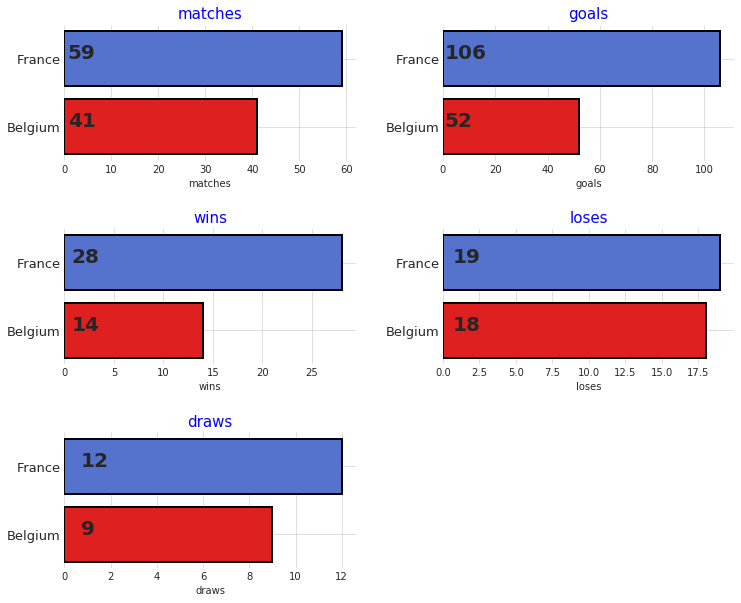

In [154]:
team_compare("France","Belgium")

# 英国 vs. 克罗地亚

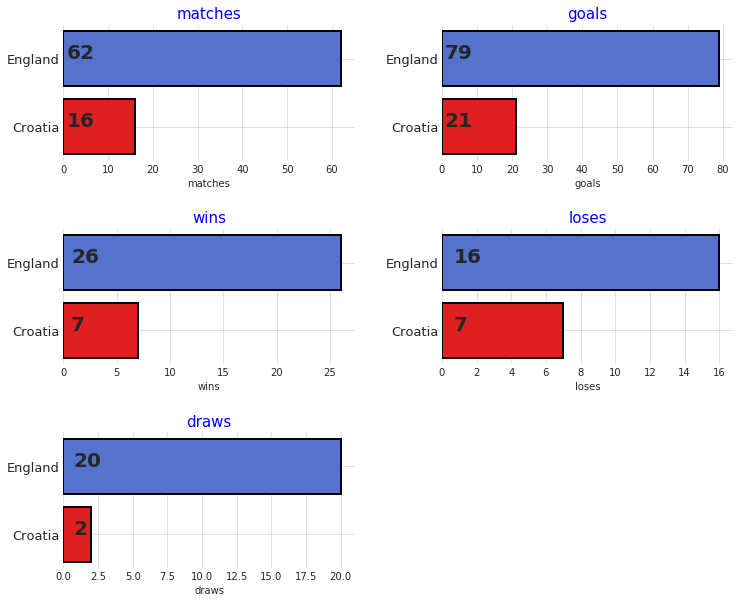

In [155]:
team_compare("England","Croatia")

# 法国 vs. 英国

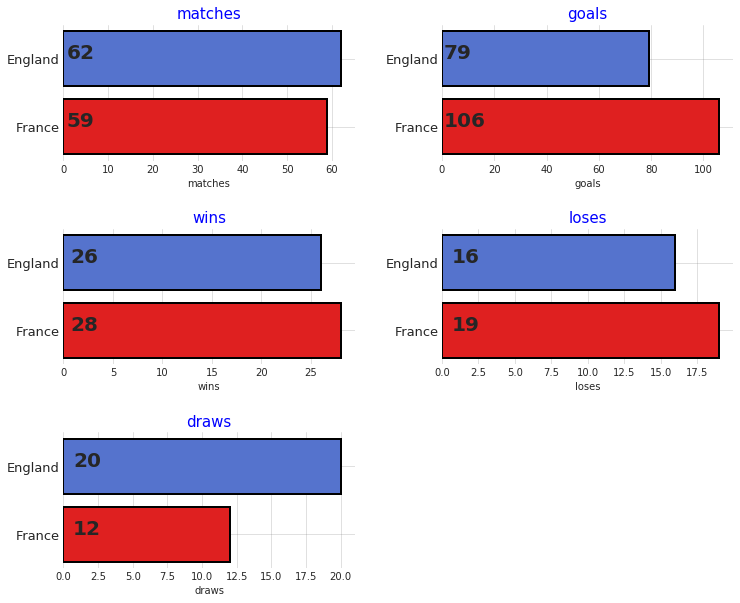

In [156]:
team_compare("France","England")